In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/agg/train.csv', sep=';', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654 entries, 0 to 1653
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   foundation_type         1654 non-null   object 
 1   concrete_code           1654 non-null   object 
 2   load_code               1654 non-null   object 
 3   wind_code               1654 non-null   object 
 4   seismic_code            1654 non-null   object 
 5   floor_number            1654 non-null   int64  
 6   total_height            1654 non-null   float64
 7   height                  1654 non-null   float64
 8   foundation_height       1654 non-null   float64
 9   double_height           1654 non-null   float64
 10  triple_height           1654 non-null   float64
 11  support_column          1654 non-null   int64  
 12  unsupported_column      1654 non-null   int64  
 13  walls_number            1654 non-null   int64  
 14  retaining_walls_number  1654 non-null   

# Top 15 Correlaciones

In [4]:
corr_matrix = df.select_dtypes(include=['float64']).corr()
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)[:15]

reinf_steel_ratio       1.000000
concrete_m3_ratio       0.516944
total_height            0.480227
height                  0.479151
walls_area              0.238914
support_area            0.232062
retaining_walls_area    0.184468
DL                      0.165128
LL_max                  0.143626
drop_panel_area         0.117846
triple_height           0.082289
inter_axis_distance     0.081387
DL_max                  0.072597
wind_load_x             0.071952
LL                      0.068779
Name: reinf_steel_ratio, dtype: float64

0.20966937050767073

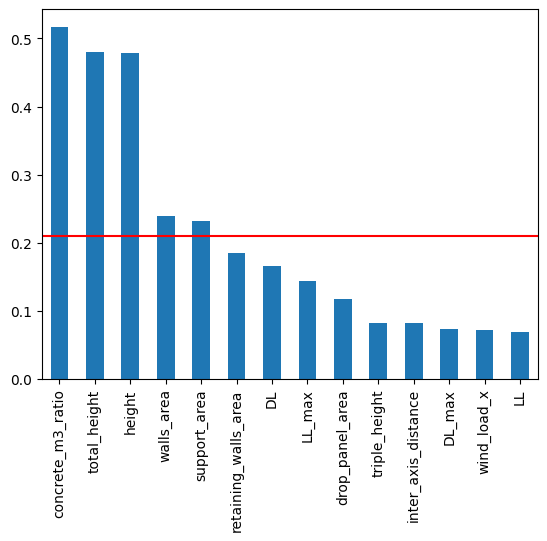

In [33]:
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)[1:15].plot(kind='bar')
mean_value = corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)[1:15].mean()
plt.axhline(y = mean_value, color = 'r', linestyle = '-')
plt.savefig('../reports/figures/clean/top15_positive_correlations_bars.pdf', bbox_inches='tight')
mean_value

-0.10950368236412285

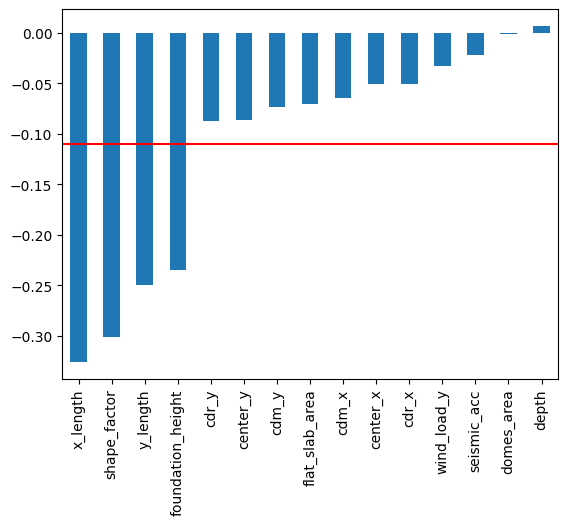

In [34]:
corr_matrix["reinf_steel_ratio"].sort_values(ascending=True)[:15].plot(kind='bar')
mean_value = corr_matrix["reinf_steel_ratio"].sort_values(ascending=True)[:15].mean()
plt.axhline(y = mean_value, color = 'r', linestyle = '-')
plt.savefig('../reports/figures/clean/top15_negative_correlations_bars.pdf', bbox_inches='tight')
mean_value

In [35]:
corr_matrix["reinf_steel_ratio"].sort_values(ascending=True)[:15]

x_length            -0.326055
shape_factor        -0.300806
y_length            -0.249681
foundation_height   -0.235096
cdr_y               -0.086871
center_y            -0.086461
cdm_y               -0.073267
flat_slab_area      -0.070369
cdm_x               -0.064210
center_x            -0.050735
cdr_x               -0.050722
wind_load_y         -0.032243
seismic_acc         -0.021723
domes_area          -0.001115
depth                0.006800
Name: reinf_steel_ratio, dtype: float64

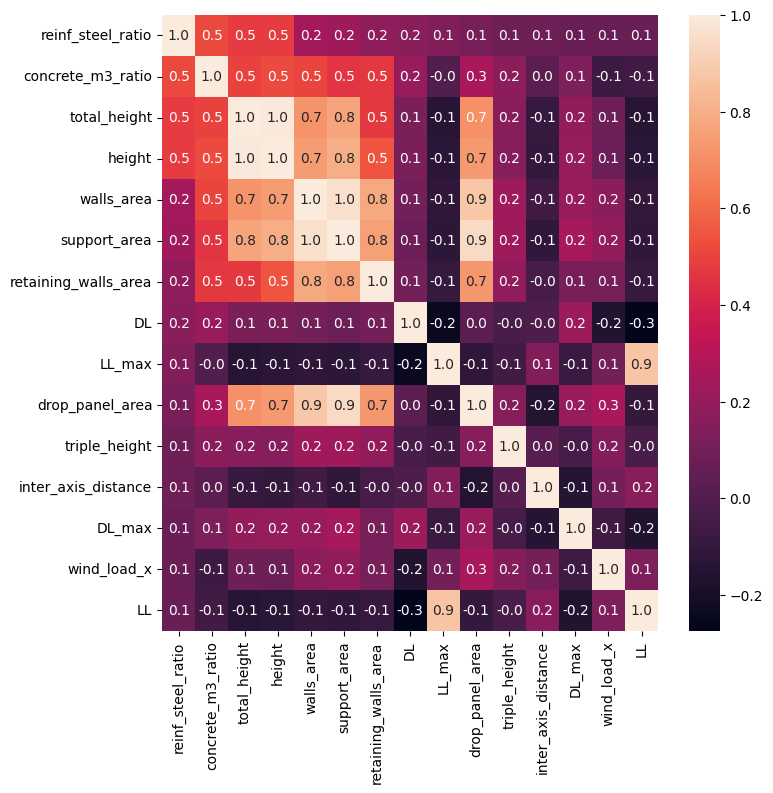

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(ax=ax, data=df[corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)[:15].index.tolist()].corr(), annot=True, fmt=".1f")
fig.savefig('../reports/figures/clean/top15_positive_correlations.pdf', bbox_inches='tight')

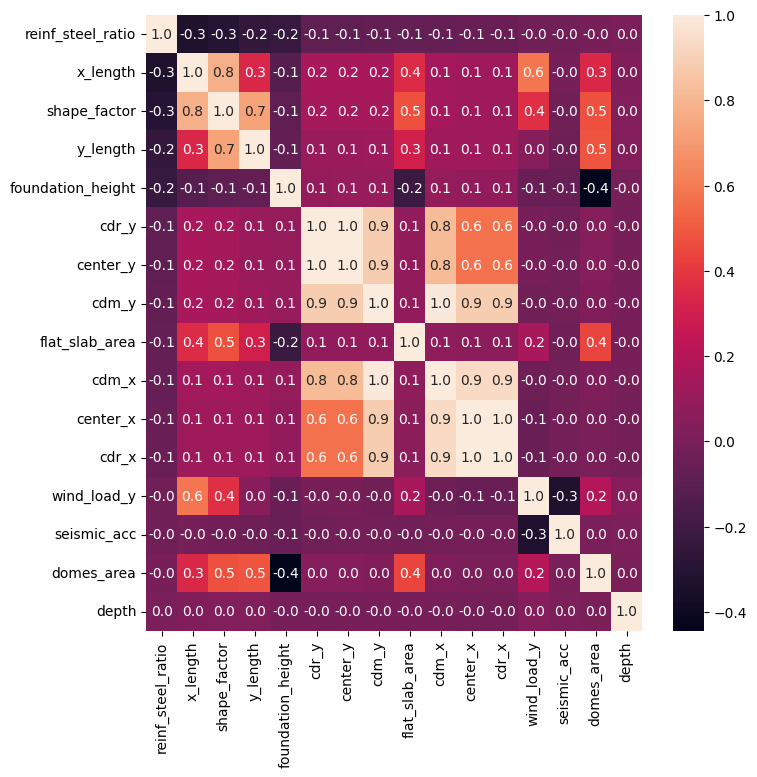

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(ax=ax, data=df[["reinf_steel_ratio"]+corr_matrix["reinf_steel_ratio"].sort_values(ascending=True)[:15].index.tolist()].corr(), annot=True, fmt=".1f")
fig.savefig('../reports/figures/clean/top15_negative_correlations.pdf', bbox_inches='tight')

In [38]:
corr_df = pd.concat(
    [
        corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)[:15].reset_index(), 
        corr_matrix["reinf_steel_ratio"].sort_values(ascending=True)[:15].reset_index()
    ], axis=1)
corr_df.columns = ['variable', 'correlación', 'variable', 'correlación']
corr_df.loc[len(corr_df)] = (('MEDIA', corr_df.iloc[:,1].mean(), 'MEDIA', corr_df.iloc[:,3].mean()))
corr_df

,variable,correlación,variable,correlación
0,reinf_steel_ratio,1.000000,x_length,-0.326055
1,concrete_m3_ratio,0.516944,shape_factor,-0.300806
2,total_height,0.480227,y_length,-0.249681
3,height,0.479151,foundation_height,-0.235096
4,walls_area,0.238914,cdr_y,-0.086871
5,support_area,0.232062,center_y,-0.086461
6,retaining_walls_area,0.184468,cdm_y,-0.073267
7,DL,0.165128,flat_slab_area,-0.070369
8,LL_max,0.143626,cdm_x,-0.064210
9,drop_panel_area,0.117846,center_x,-0.050735


In [39]:
corr_df.to_latex(
    'initial_top_15_correlation.tex', index=False, float_format="%.2f")

/tmp/ipykernel_199639/1396760104.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  corr_df.to_latex(


# Características generales

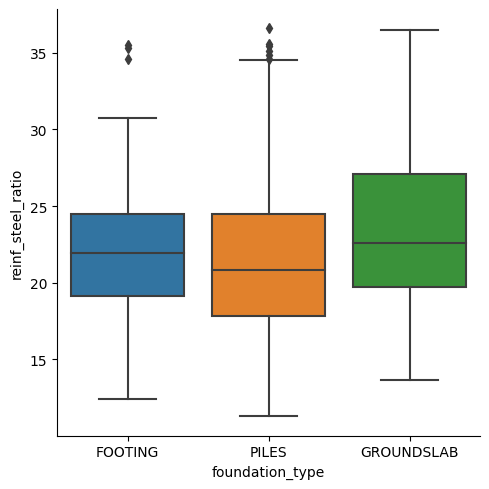

In [40]:
sns.catplot(data=df, x="foundation_type", y="reinf_steel_ratio", kind="box")

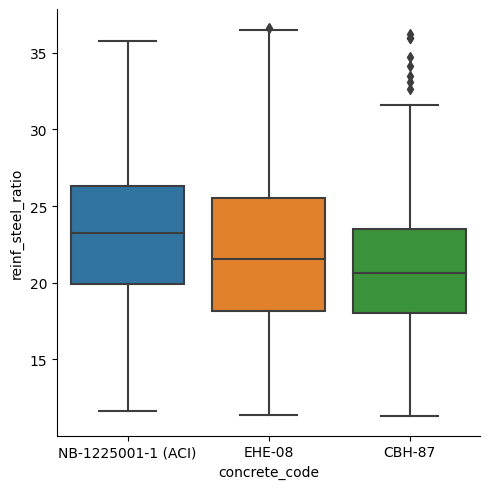

In [41]:
sns.catplot(data=df, x="concrete_code", y="reinf_steel_ratio", kind="box")

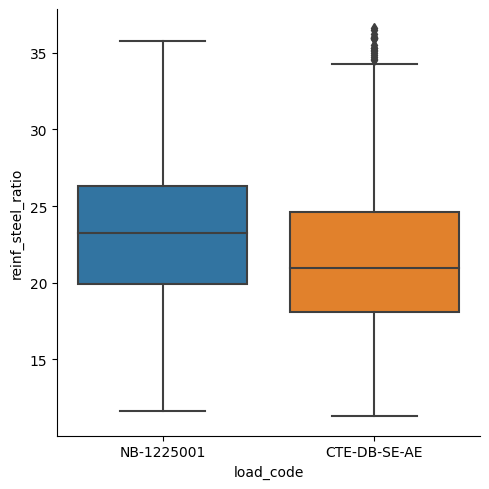

In [42]:
sns.catplot(data=df, x="load_code", y="reinf_steel_ratio", kind="box")

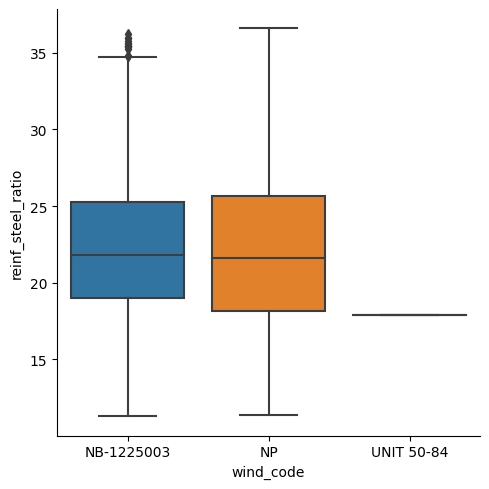

In [43]:
sns.catplot(data=df, x="wind_code", y="reinf_steel_ratio", kind="box")

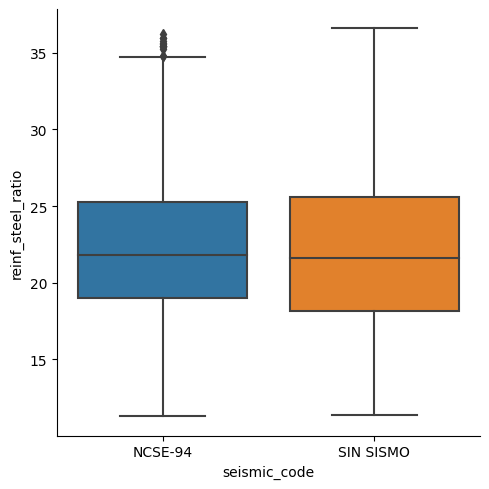

In [44]:
sns.catplot(data=df, x="seismic_code", y="reinf_steel_ratio", kind="box")

<AxesSubplot: >

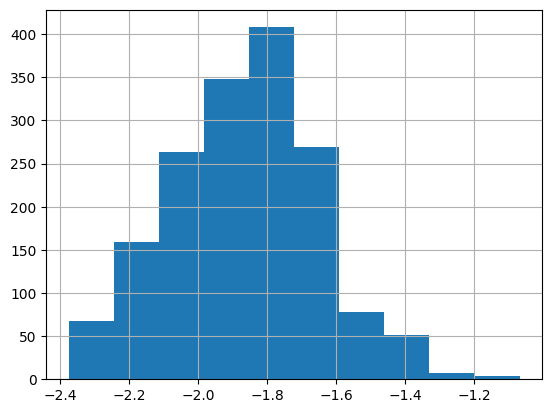

In [45]:
pd.Series(np.log(df['concrete_m3_ratio'])).hist()

# Alturas

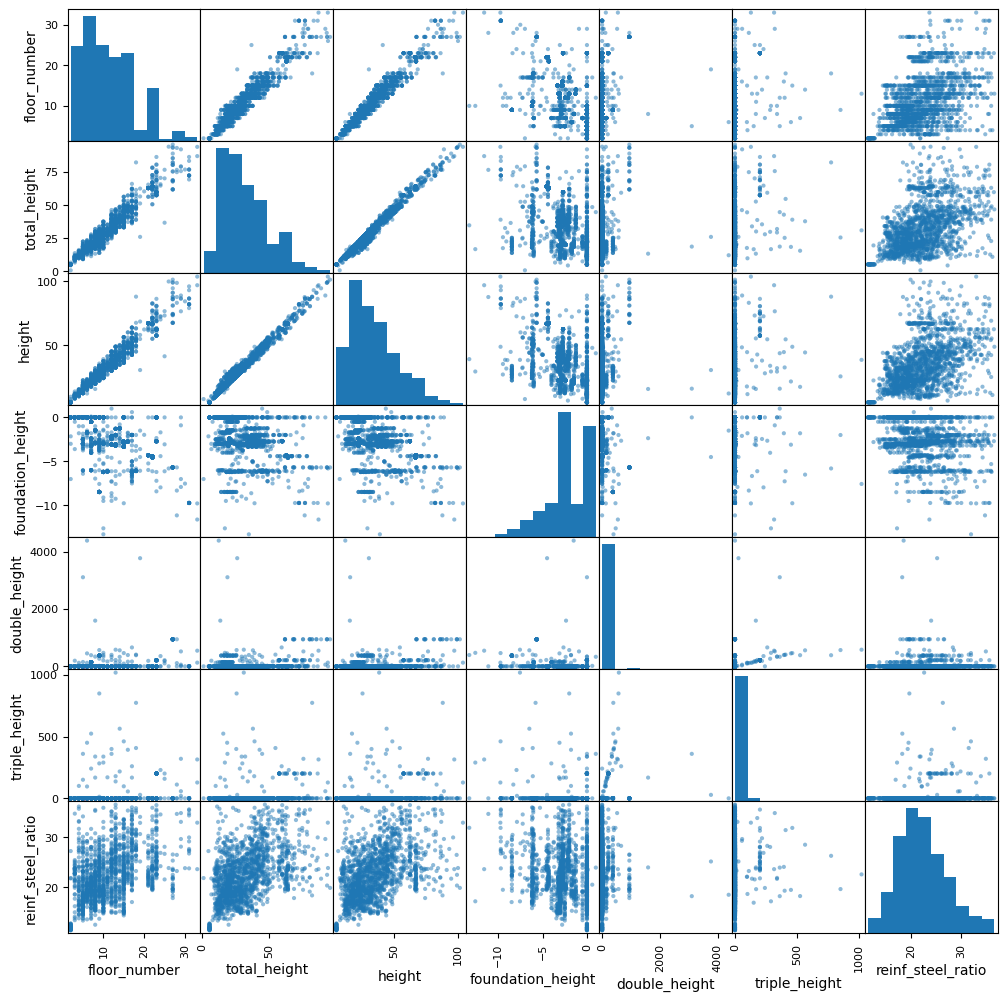

In [46]:
from pandas.plotting import scatter_matrix

attributes = ['floor_number', 'total_height', 'height', 'foundation_height', 'double_height', 'triple_height', 'reinf_steel_ratio']
scatter_matrix(df[attributes], figsize=(12, 12))
plt.show()

In [47]:
df['slab_area_mean'] = df['slab_total_area'] / df['floor_number']
df['height_mean'] = df['height'] / df['floor_number']
df['double_height_ratio'] = df['double_height'] / df['slab_total_area']
df['triple_height_ratio'] = df['triple_height'] / df['slab_total_area']
df['slenderness'] = df['slab_area_mean'] / df['total_height']

In [48]:
corr_matrix = df[['reinf_steel_ratio', 'slab_area_mean', 
                  'height_mean', 'double_height_ratio', 'triple_height_ratio', 'slenderness']].corr()
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)[:10]

reinf_steel_ratio      1.000000
height_mean            0.216949
triple_height_ratio    0.036839
double_height_ratio    0.014472
slenderness           -0.261728
slab_area_mean        -0.368483
Name: reinf_steel_ratio, dtype: float64

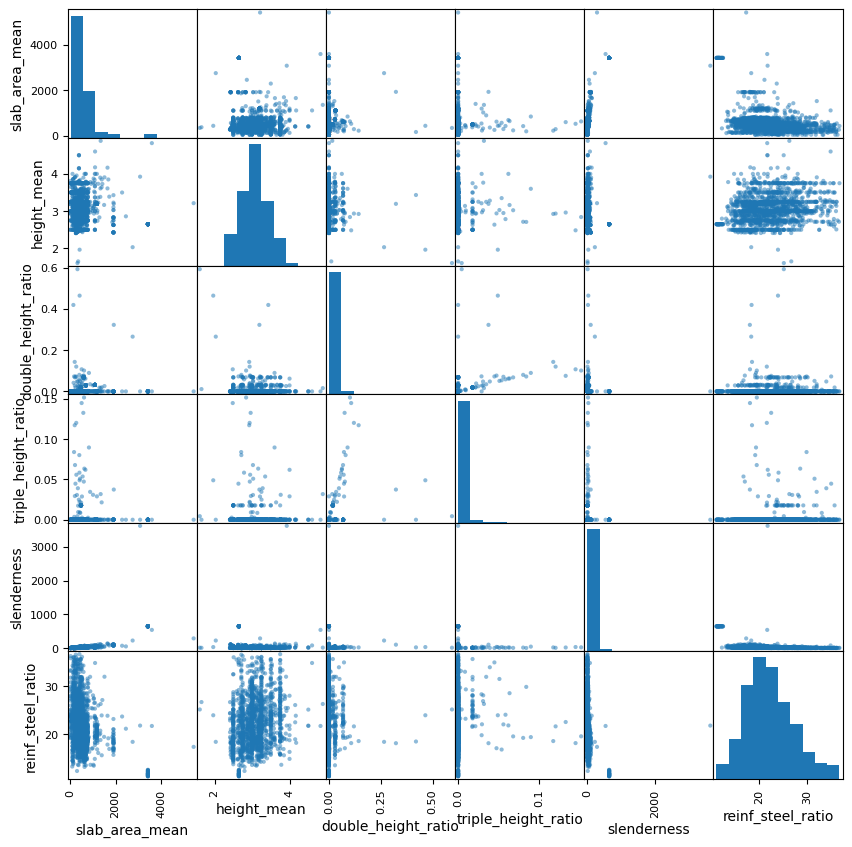

In [49]:
attributes = ['slab_area_mean', 'height_mean', 'double_height_ratio', 'triple_height_ratio', 'slenderness', 'reinf_steel_ratio']
scatter_matrix(df[attributes], figsize=(10, 10))
plt.show()

# Soportes

- **support_column:** Número de elementos de sustentación que llegan al forjado (pilares+pantallas+muros de contención).
- **unsupported_column:** Número de soportes que nacen en el forjado (apeados).
- **walls_number:** Número de pantallas y muros de contención que llegan al forjado.
- **retaining_walls_number:** Número de muros de contención que llegan al forjado.
- **support_area:** Incluye el área en planta de muros, pilares y pantallas. Pilares y pantallas apeados NO se incluyen.
- **walls_area**: Área de pantallas y muros de contención que llegan al forjado.
- **retaining_walls_area:** Área de muros de contención que llegan al forjado.

In [50]:
support_fields = ['support_column', 'unsupported_column', 'walls_number', 'retaining_walls_number', 
                  'support_area', 'walls_area', 'retaining_walls_area']

In [51]:
df['column_area'] = df['support_area'] - df['walls_area']
df['swall_num'] = df['walls_number'] - df['retaining_walls_number']
df['swall_area'] = df['walls_area'] - df['retaining_walls_area']
df['swall_area_mean'] = df['swall_area'] / df['swall_num']
df['col_area_mean'] = df['column_area'] / df['support_column']
df['rwalls_area_mean'] = df['retaining_walls_area'] / df['retaining_walls_number']

In [52]:
corr_matrix = df[
    ['reinf_steel_ratio', 'swall_area_mean', 'col_area_mean', 'rwalls_area_mean']
].corr()
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)

reinf_steel_ratio    1.000000
col_area_mean        0.395629
rwalls_area_mean     0.092778
swall_area_mean      0.009921
Name: reinf_steel_ratio, dtype: float64

In [53]:
df['swall_area_mean_m2'] = df['swall_area_mean'] / df['slab_area_mean']
df['col_area_mean_m2'] = df['col_area_mean'] / df['slab_area_mean']
df['rwalls_area_mean_m2'] = df['rwalls_area_mean'] / df['slab_area_mean']

In [54]:
corr_matrix = df[
    ['reinf_steel_ratio', 'swall_area_mean_m2', 'col_area_mean_m2', 'rwalls_area_mean_m2']
].corr()
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)

reinf_steel_ratio      1.000000
col_area_mean_m2       0.471712
rwalls_area_mean_m2    0.394188
swall_area_mean_m2     0.311521
Name: reinf_steel_ratio, dtype: float64

In [55]:
df['swall_area_ratio'] = df['swall_area'] / df['slab_total_area']
df['col_area_ratio'] = df['column_area'] / df['slab_total_area']
df['rwals_area_ratio'] = df['retaining_walls_area'] / df['slab_total_area']

In [56]:
corr_matrix = df[
    ['reinf_steel_ratio', 'swall_area_ratio', 'col_area_ratio', 'rwals_area_ratio']
].corr()
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)

reinf_steel_ratio    1.000000
swall_area_ratio     0.371999
col_area_ratio       0.308782
rwals_area_ratio     0.226315
Name: reinf_steel_ratio, dtype: float64

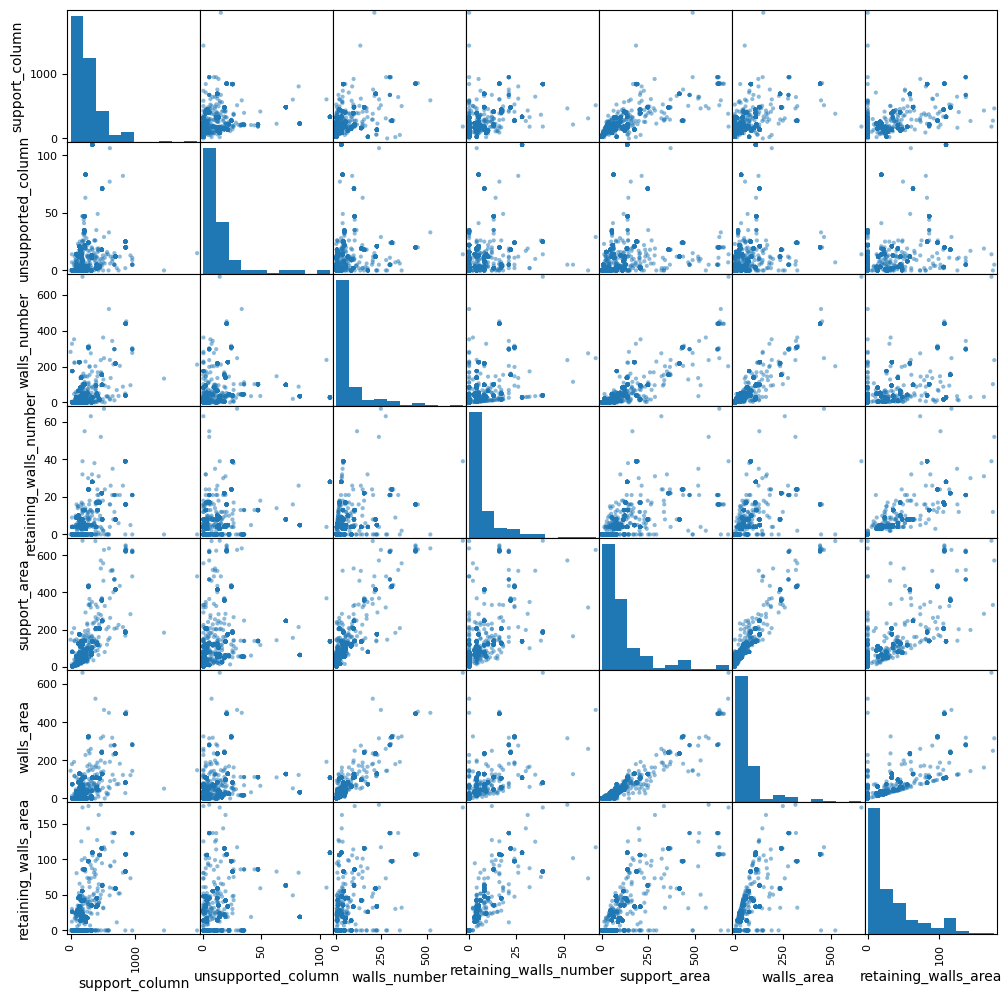

In [57]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[support_fields], figsize=(12, 12))
plt.show()

# Cargas

In [58]:
load_fields = ['LL', 'DL', 'LL_max', 'DL_max', 'wind_load_x', 'wind_load_y', 'seismic_acc']

In [59]:
corr_matrix = df[
    ["reinf_steel_ratio"] + load_fields
].corr()
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)

reinf_steel_ratio    1.000000
DL                   0.165128
LL_max               0.143626
DL_max               0.072597
wind_load_x          0.071952
LL                   0.068779
seismic_acc         -0.021723
wind_load_y         -0.032243
Name: reinf_steel_ratio, dtype: float64

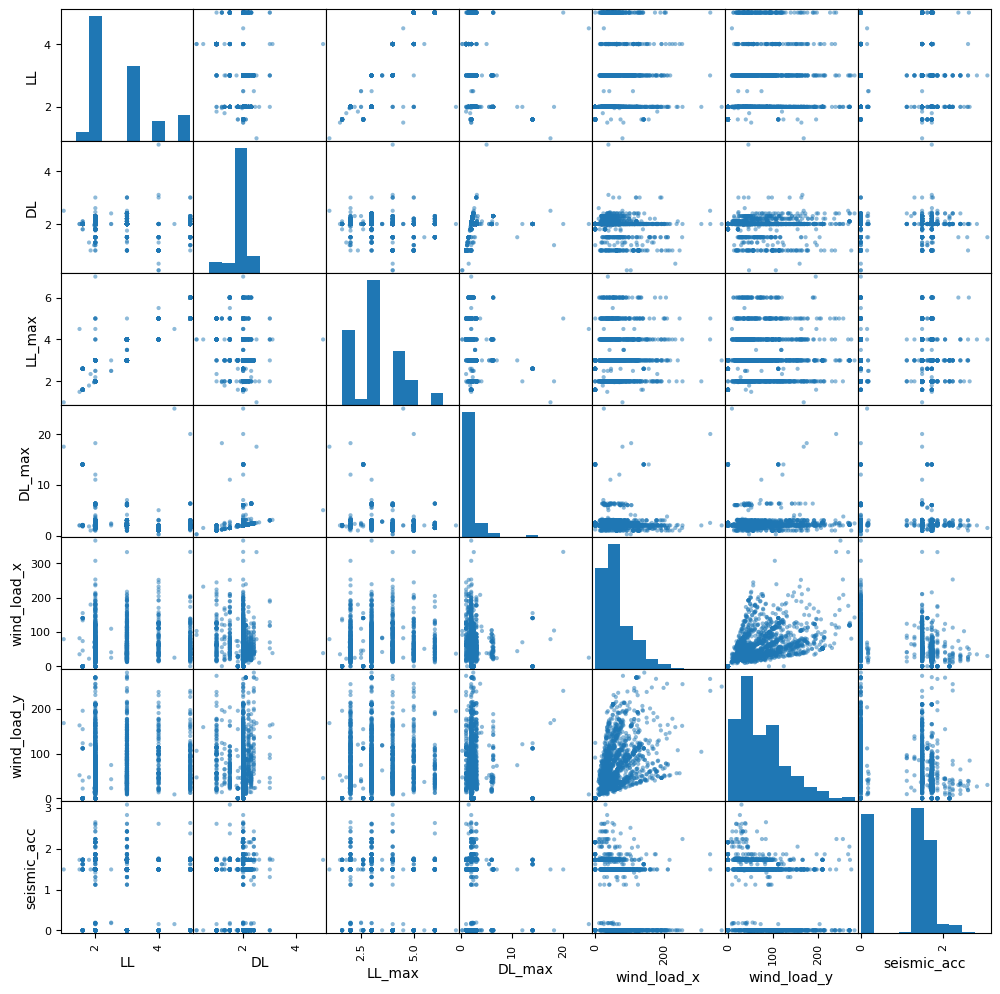

In [60]:
scatter_matrix(df[load_fields], figsize=(12, 12))
plt.show()

In [61]:
df['LL_m2'] = df['LL'] / df['slab_area_mean']
df['DL_m2'] = df['DL'] / df['slab_area_mean']
df['LL_max_m2'] = df['LL_max'] / df['slab_area_mean']
df['DL_max_m2'] = df['DL_max'] / df['slab_area_mean']
df['wind_load_x_m2'] = df['wind_load_x'] / df['slab_area_mean']
df['wind_load_y_m2'] = df['wind_load_y'] / df['slab_area_mean']
df['seismic_acc_m2'] = df['seismic_acc'] / df['slab_area_mean']

In [62]:
df['wind_load_x_h'] = df['wind_load_x'] / df['slenderness']
df['wind_load_y_h'] = df['wind_load_y'] / df['slenderness']

In [63]:
corr_matrix = df[
    ["reinf_steel_ratio"] + ['LL_m2', 'DL_m2', 'LL_max_m2', 'DL_max_m2', 'wind_load_x_m2', 'wind_load_y_m2', 'seismic_acc_m2', 
                             'wind_load_x_h', 'wind_load_y_h']
].corr()
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)

reinf_steel_ratio    1.000000
wind_load_x_h        0.523845
wind_load_y_h        0.507809
wind_load_x_m2       0.309809
wind_load_y_m2       0.265038
LL_max_m2            0.238151
LL_m2                0.226890
DL_max_m2            0.213136
DL_m2                0.199764
seismic_acc_m2       0.181057
Name: reinf_steel_ratio, dtype: float64

# Forjados

    'slab_total_area': 'sum', 'flat_slab_area': 'sum', 
    'waffle_slab_area': 'sum', 'depth': 'median', 
    'drop_panel_area': 'sum',  'domes_area': 'sum',
    'domes_number': 'sum', 'inter_axis_distance': 'last',

In [64]:
slab_fields = ['slab_total_area', 'flat_slab_area', 'waffle_slab_area', 'depth', 'drop_panel_area', 'domes_area',
               'domes_number', 'inter_axis_distance']

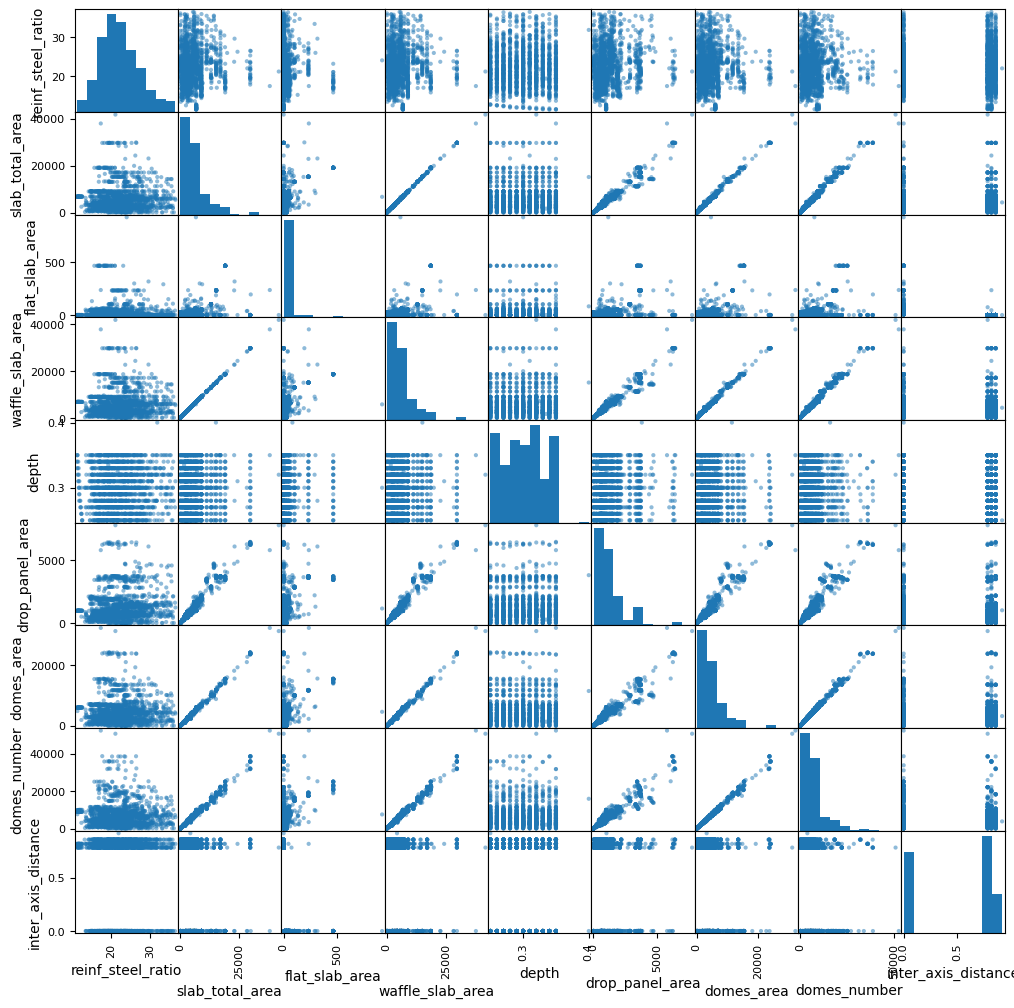

In [65]:
scatter_matrix(df[['reinf_steel_ratio'] + slab_fields], figsize=(12, 12))
plt.show()

In [66]:
corr_matrix = df[
    ["reinf_steel_ratio"] + slab_fields
].corr()
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)

reinf_steel_ratio      1.000000
drop_panel_area        0.117846
inter_axis_distance    0.081387
waffle_slab_area       0.026875
slab_total_area        0.025713
depth                  0.006800
domes_number           0.003021
domes_area            -0.001115
flat_slab_area        -0.070369
Name: reinf_steel_ratio, dtype: float64

In [67]:
df['flat_slab_area_ratio'] = df['flat_slab_area'] / df['slab_total_area']
df['waffle_slab_area_ratio'] = df['waffle_slab_area'] / df['slab_total_area']
df['drop_panel_area_ratio'] = df['drop_panel_area'] / df['slab_total_area']
df['domes_area_ratio'] = (df['domes_area'] / df['slab_total_area'])

In [68]:
df['drop_panel_area_support'] = df['drop_panel_area'] / (df['support_column'] + df['swall_num'])
df['drop_panel_area_support_m2'] = df['drop_panel_area_support'] / df['slab_area_mean']

In [69]:
corr_matrix = df[
    ["reinf_steel_ratio"] + ['flat_slab_area_ratio', 'waffle_slab_area_ratio', 'drop_panel_area_ratio', 'domes_area_ratio',
                            'drop_panel_area_support', 'drop_panel_area_support_m2']
].corr()
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)

reinf_steel_ratio             1.000000
drop_panel_area_ratio         0.456890
drop_panel_area_support_m2    0.397442
drop_panel_area_support       0.141876
flat_slab_area_ratio          0.002937
waffle_slab_area_ratio       -0.002937
domes_area_ratio             -0.334595
Name: reinf_steel_ratio, dtype: float64

In [70]:
df['drop_panel_area_ratio'] = df['drop_panel_area'] / df['slab_total_area']

# Forma
    'shape_factor': 'median', 'x_length': 'median', 
    'y_length': 'median', 'center_x': 'median',
    'center_y': 'median', 'cdm_x': 'median', 
    'cdm_y': 'median', 'cdr_x': 'median', 
    'cdr_y': 'median',

In [71]:
shape_fields = ['shape_factor', 'x_length', 'y_length', 'center_x', 'center_y',
                'cdm_x', 'cdm_y', 'cdr_x', 'cdr_y']

In [72]:
corr_matrix = df[
    ["reinf_steel_ratio"] + shape_fields
].corr()
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)

reinf_steel_ratio    1.000000
cdr_x               -0.050722
center_x            -0.050735
cdm_x               -0.064210
cdm_y               -0.073267
center_y            -0.086461
cdr_y               -0.086871
y_length            -0.249681
shape_factor        -0.300806
x_length            -0.326055
Name: reinf_steel_ratio, dtype: float64

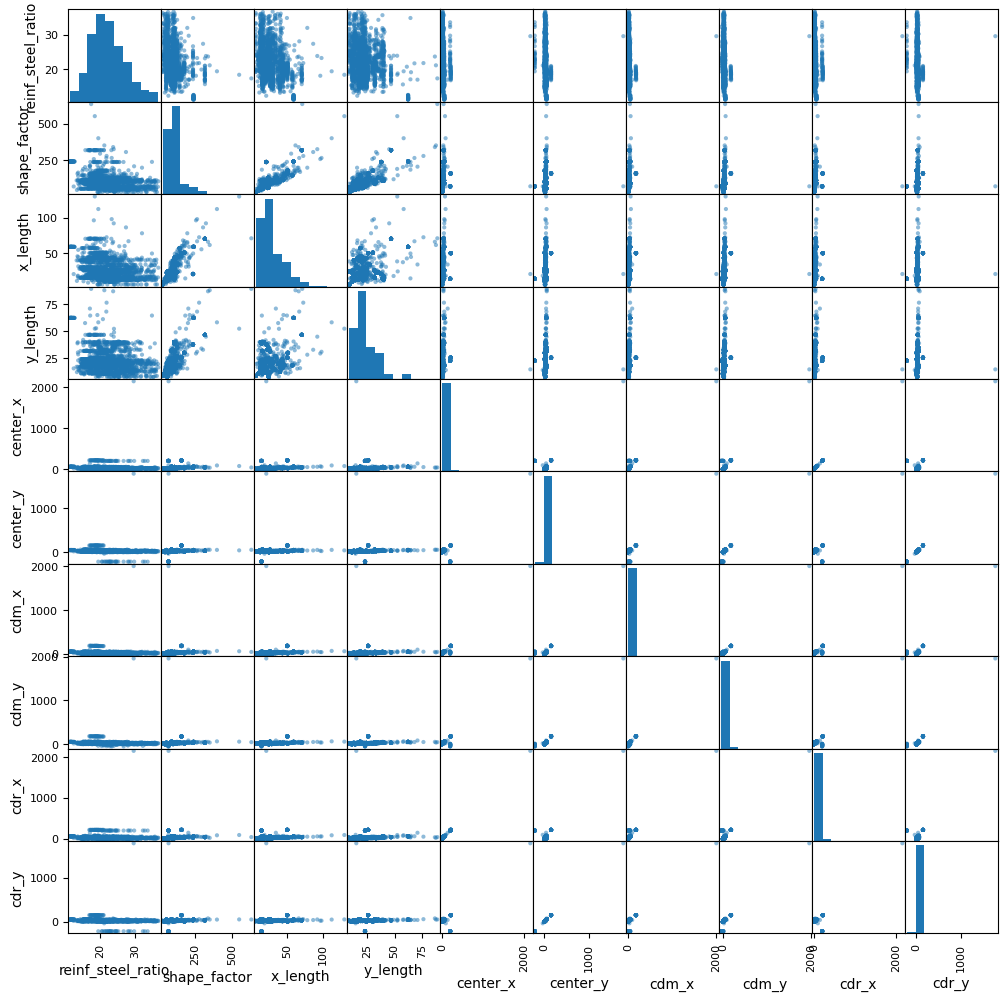

In [73]:
scatter_matrix(df[['reinf_steel_ratio'] + shape_fields], figsize=(12, 12))
plt.show()

In [74]:
df['eccentricity'] = ((df['cdm_x'] - df['cdr_x']) * (df['cdm_x'] - df['cdr_x']) + 
                      (df['cdm_y'] - df['cdr_y']) * (df['cdm_y'] - df['cdr_y']))**0.5

In [75]:
df['eccentricity_l'] = (df['eccentricity'] / df[['x_length', 'y_length']].max(axis=1))

In [76]:
corr_matrix = df[['reinf_steel_ratio', 'eccentricity', 'eccentricity_l']].corr()
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)[:10]

reinf_steel_ratio    1.000000
eccentricity_l       0.065597
eccentricity         0.031834
Name: reinf_steel_ratio, dtype: float64

In [77]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/features/train.csv', sep=';', index_col=0)

In [78]:
corr_matrix = corr_matrix[corr_matrix[corr_matrix > 0.9].isnull().sum() != 73]

In [80]:
corr_matrix = df.select_dtypes(include=['float64']).corr()
corr_df = pd.concat(
    [
        corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)[:15].reset_index(), 
        corr_matrix["reinf_steel_ratio"].sort_values(ascending=True)[:15].reset_index()
    ], axis=1)
corr_df.columns = ['variable', 'correlación', 'variable', 'correlación']
corr_df.loc[len(corr_df)] = (('MEDIA', corr_df.iloc[:,1].mean(), 'MEDIA', corr_df.iloc[:,3].mean()))
corr_df

,variable,correlación,variable,correlación
0,reinf_steel_ratio,1.000000,slab_area_mean,-0.368483
1,wind_load_x_h,0.523845,domes_area_ratio,-0.334595
2,concrete_m3_ratio,0.516944,x_length,-0.326055
3,wind_load_y_h,0.507809,shape_factor,-0.300806
4,total_height,0.480227,slenderness,-0.261728
5,height,0.479151,y_length,-0.249681
6,col_area_mean_m2,0.471712,foundation_height,-0.235096
7,drop_panel_area_ratio,0.456890,cdr_y,-0.086871
8,drop_panel_area_support_m2,0.397442,center_y,-0.086461
9,col_area_mean,0.395629,cdm_y,-0.073267


0.42019554848728224

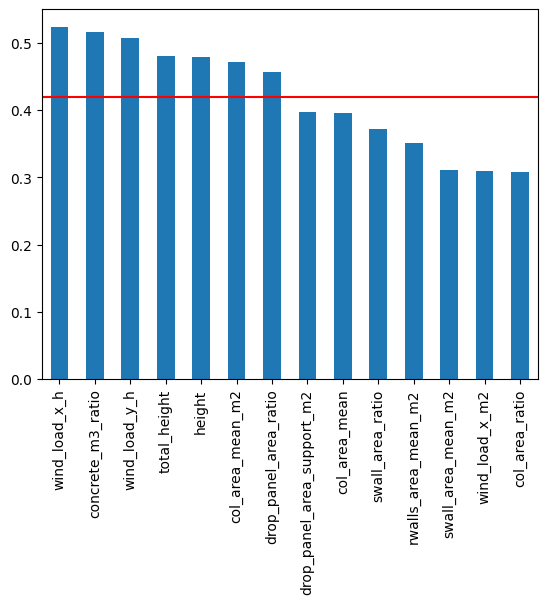

In [81]:
corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)[1:15].plot(kind='bar')
mean_value = corr_matrix["reinf_steel_ratio"].sort_values(ascending=False)[1:15].mean()
plt.axhline(y = mean_value, color = 'r', linestyle = '-')
plt.savefig('../reports/figures/clean/top15_final_positive_correlations_bars.pdf', bbox_inches='tight')
mean_value

-0.17275475365785256

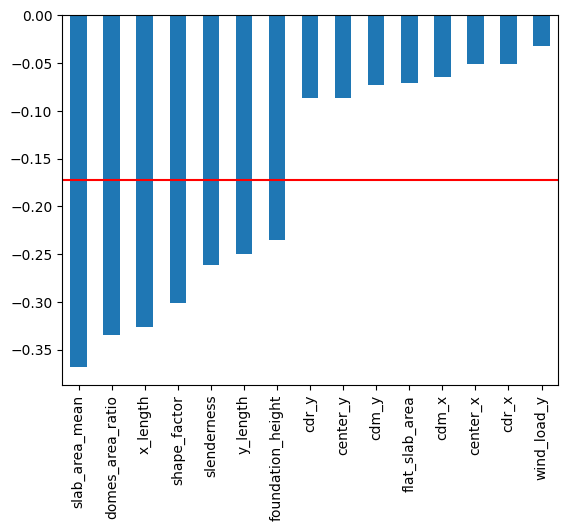

In [85]:
corr_matrix["reinf_steel_ratio"].sort_values(ascending=True)[:15].plot(kind='bar')
mean_value = corr_matrix["reinf_steel_ratio"].sort_values(ascending=True)[:15].mean()
plt.axhline(y = mean_value, color = 'r', linestyle = '-')
plt.savefig('../reports/figures/clean/top15_final_negative_correlations_bars.pdf', bbox_inches='tight')
mean_value

In [50]:
corr_df.to_latex(
    'final_top_15_correlation.tex', index=False, float_format="%.2f")

/tmp/ipykernel_43754/2541090992.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  corr_df.to_latex(
